In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df=pd.read_csv('/content/sample_data/cancer_classification.csv')

In [12]:
# this csvc have 569 instances
df.describe().transpose()
#to find out the 

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


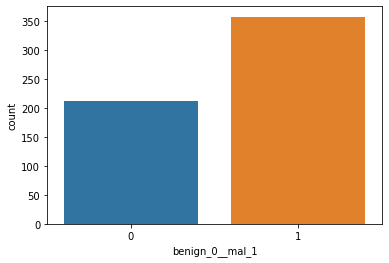

In [13]:
# for classification tasks to see number of instances for a label and see if its well balanced or not
sns.countplot(x='benign_0__mal_1',data=df)

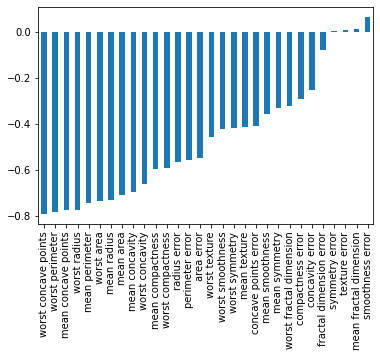

In [14]:
# checkout the correlation view wrt label we're trying to predict 
# and you can sort values and plot with kind of bar or scatter
# Grab everything drop this by using :-1 dropped that label column
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

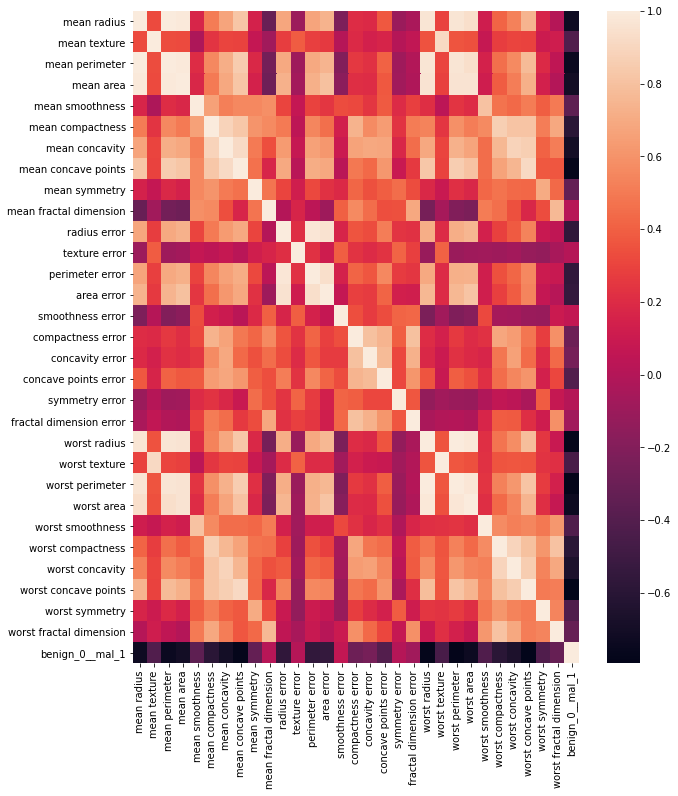

In [15]:
plt.figure(figsize=(10,12))
sns.heatmap(df.corr())

In [16]:
X=df.drop('benign_0__mal_1',axis=1).values
# Its numpy array
y=df['benign_0__mal_1'].values

In [17]:
from sklearn.model_selection import train_test_split


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler =MinMaxScaler()

In [21]:
X_train=scaler.fit_transform(X_train)

In [22]:
X_test=scaler.transform(X_test)

In [23]:
from tensorflow.keras.models import Sequential

In [24]:
from tensorflow.keras.layers import Dense,Dropout

In [25]:
X_train.shape

(426, 30)

In [26]:
model=Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

# Binary classification model you need sigmoid function for last activation
model.add(Dense(1,activation='sigmoid'))
 
model.compile(loss='binary_crossentropy',optimizer='adam')

In [36]:
# Train model with overfit case
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 13ms/step - loss: 0.6934 - val_loss: 0.6589
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6509 - val_loss: 0.6271
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6117 - val_loss: 0.5914
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5694 - val_loss: 0.5538
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5411 - val_loss: 0.5119
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4919 - val_loss: 0.4697
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4524 - val_loss: 0.4295
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4243 - val_loss: 0.3913
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3701 - val_loss: 0.3554
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3572 - val_loss: 0.3219
Epoch 11

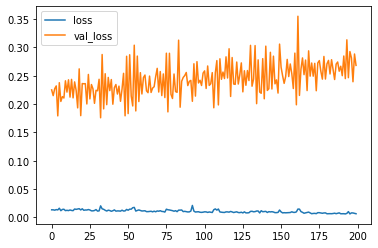

In [32]:
#plot out the loss training loss and validataion loss
losses=pd.DataFrame(model.history.history)
losses.plot()

In [33]:
model=Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

# Binary classification model you need sigmoid function for last activation
model.add(Dense(1,activation='sigmoid'))
 
model.compile(loss='binary_crossentropy',optimizer='adam')

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
# help(EarlyStopping)
# tracking validation loss min change required  we do have a patience parameter if validation loss happening 
# Mode is basically min or maximize accuracy verbose to give report patient is a stopping point
earl_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [39]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
          callbacks=[earl_stop])

Epoch 1/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0042 - val_loss: 0.3244
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0040 - val_loss: 0.3150
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0036 - val_loss: 0.3184
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0039 - val_loss: 0.3187
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0037 - val_loss: 0.3149
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0037 - val_loss: 0.3291
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.3413
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0036 - val_loss: 0.3382
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0044 - val_loss: 0.3184
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0041 - val_loss: 0.3396
Epoch 11/

In [40]:
# choose some arbitrary number like epochs and you can callback with early stops

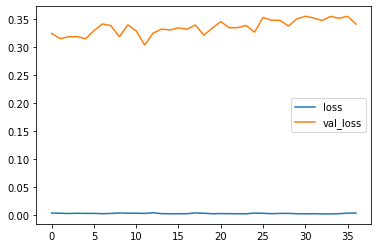

In [42]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()

In [43]:
# Add drop out layers it will turn off (prevent overfiting) percentage of neurons randomly
from tensorflow.keras.layers import Dropout
model=Sequential()
model.add(Dense(30,activation='relu'))
# Rate is the prob randomly turn off the neurons 50% for each batch
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))

# Binary classification model you need sigmoid function for last activation
model.add(Dense(1,activation='sigmoid'))
 
model.compile(loss='binary_crossentropy',optimizer='adam') 

In [44]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
          callbacks=[earl_stop])

Epoch 1/600
14/14 [==============================] - 1s 15ms/step - loss: 0.6930 - val_loss: 0.6748
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6703 - val_loss: 0.6554
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6669 - val_loss: 0.6354
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6438 - val_loss: 0.6120
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6167 - val_loss: 0.5867
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5980 - val_loss: 0.5567
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5530 - val_loss: 0.5203
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5415 - val_loss: 0.4850
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5127 - val_loss: 0.4505
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4819 - val_loss: 0.4167
Epoch 11

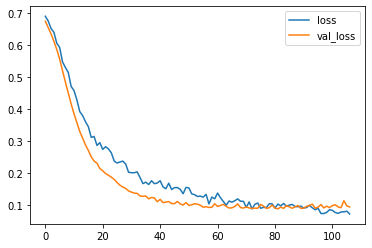

In [46]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()

In [48]:
# classification task 
predictons = model.predict_classes(X_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [49]:
from sklearn.metrics import classification_report,confusion_matrix

In [50]:
print (classification_report(y_test,predictons))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        55
           1       0.98      1.00      0.99        88

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143



In [51]:
print (confusion_matrix(y_test,predictons))

[[53  2]
 [ 0 88]]
